In [32]:
using Pkg; Pkg.activate(".")
using LakeTank
using Plots

  Activating project at `/state/partition1/data1/john/LakeTank`


In [33]:
I₁(t) = 0.0
I₂(t) = 1000000.0
#          P₁o,  P₂o,    Vp₁,     Vp₂,    Psc,     Tsc,   Pwf,   n, J₁, J₂,     T₁,     T₂, ρ,       T,    I₁, I₂, tmax
params = [2000, 2000, 1000.0,  1000.0, 14.504,  518.67,  1800, 1.0,  2,  2, 679.66, 679.66, 0.04444, 2000, I₁, I₂, 1.0]
sol = tank_solve(params...);

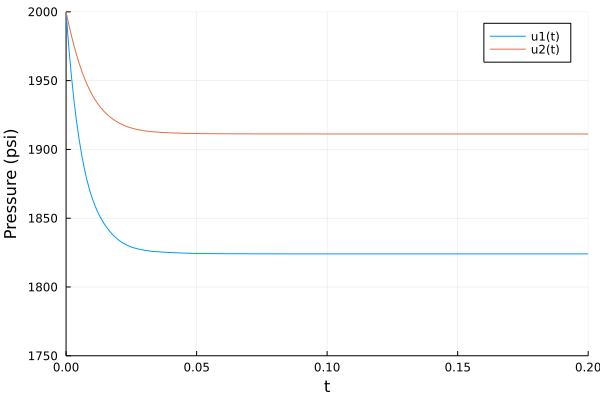

In [44]:
plot(sol, xlim=(0,0.2), ylim=(1750,2000), ylabel="Pressure (psi)")

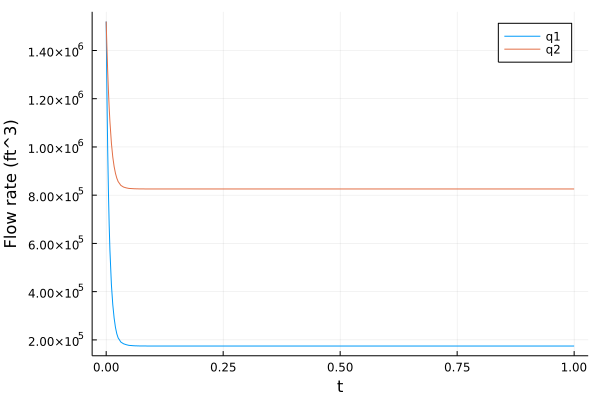

In [43]:
p1 = getindex.(sol.u, 1)
p2 = getindex.(sol.u, 2)
Pwf, n, J1 = params[7:9] 
q1 = LakeTank.Q(p1, [J1, Pwf, n])
J2 = params[10]
q2 = LakeTank.Q(p2, [J2, Pwf, n])
plot(sol.t, q1, label="q1", ylabel="Flow rate (ft^3)", xlabel="t")
plot!(sol.t, q2, label="q2")